### Unicorn Company in the World

##### An analysis into Unicorn companies, total funding received, city of incorporation, current valuation and some selected investors.

In [1]:
# import the neccesary libraries ....

import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

###### Used Excel to check through the data, calculate through the years to become a Unicorn and calculate the ROI.
###### All figures are in billion dollars, except ROI which is multiples

In [176]:
working_directory = os.getcwd()
path = working_directory + '/Unicorn_Companies.csv'
df = pd.read_csv(path)
df.head(2)

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors,Year to be a unicorn,Return on investment
0,Bytedance,180,07/04/2017,Artificial Intelligence,Beijing,China,Asia,2012,8,"Sequoia Capital China, SIG Asia Investments, S...",5,23
1,SpaceX,100,01/12/2012,Other,Hawthorne,United States,North America,2002,7,"Founders Fund, Draper Fisher Jurvetson, Rothen...",10,14


In [177]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1074 entries, 0 to 1073
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Company               1074 non-null   object
 1   Valuation             1074 non-null   int64 
 2   Date Joined           1074 non-null   object
 3   Industry              1074 non-null   object
 4   City                  1058 non-null   object
 5   Country               1074 non-null   object
 6   Continent             1074 non-null   object
 7   Year Founded          1074 non-null   int64 
 8   Funding               1074 non-null   int64 
 9   Select Investors      1073 non-null   object
 10  Year to be a unicorn  1074 non-null   int64 
 11  Return on investment  1074 non-null   int64 
dtypes: int64(5), object(7)
memory usage: 100.8+ KB


In [96]:
df.shape

(1074, 12)

In [ ]:
df.mean()

C:\Users\sadeo\AppData\Local\Temp/ipykernel_11176/3698961737.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df.mean()
C:\Users\sadeo\AppData\Local\Temp/ipykernel_11176/3698961737.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.mean()


Valuation                  3.455307
Year_Founded            2012.895717
Year_to_be_a_unicorn       7.000931
Return_on_investment       1.667598
dtype: float64

In [180]:
# rename the columns for with space using underscore, for easy access

df.columns = df.columns.str.replace(' ', '_')
df.tail(1)

,Company,Valuation,Date_Joined,Industry,City,Country,Continent,Year_Founded,Funding,Select_Investors,Year_to_be_a_unicorn,Return_on_investment
1073,Zwift,1,16/09/2020,E-commerce & direct-to-consumer,Long Beach,United States,North America,2014,1,"Novator Partners, True, Causeway Media Partners",6,1


In [181]:
df['Date_Joined'] = pd.to_datetime(df['Date_Joined'])
df.head(2)

,Company,Valuation,Date_Joined,Industry,City,Country,Continent,Year_Founded,Funding,Select_Investors,Year_to_be_a_unicorn,Return_on_investment
0,Bytedance,180,2017-07-04,Artificial Intelligence,Beijing,China,Asia,2012,8,"Sequoia Capital China, SIG Asia Investments, S...",5,23
1,SpaceX,100,2012-01-12,Other,Hawthorne,United States,North America,2002,7,"Founders Fund, Draper Fisher Jurvetson, Rothen...",10,14


In [213]:
plt.scatter(df.Valuation, df.Funding)
plt.show()

#### Industries and No of Unicorns

In [ ]:
list(set(df.Country))
list(set(df.Industry))

['Auto & transportation',
 'Other',
 'Artificial Intelligence',
 'Travel',
 'Internet software & services',
 'Consumer & retail',
 'Health',
 'Fintech',
 'E-commerce & direct-to-consumer',
 'Supply chain, logistics, & delivery',
 'Data management & analytics',
 'Cybersecurity',
 'Edtech',
 'Hardware',
 'Mobile & telecommunications']

In [68]:
# Industry classification of Unicorns

Industy_unicorn = df.groupby('Industry').count()
Industy_unicorn = Industy_unicorn.sort_values(by='Company', ascending=False)
Industy_unicorn.Company

Industry
Fintech                                224
Internet software & services           205
E-commerce & direct-to-consumer        111
Artificial Intelligence                 84
Health                                  74
Other                                   58
Supply chain, logistics, & delivery     57
Cybersecurity                           50
Data management & analytics             41
Mobile & telecommunications             38
Hardware                                34
Auto & transportation                   31
Edtech                                  28
Consumer & retail                       25
Travel                                  14
Name: Company, dtype: int64

Text(0.5, 0, 'No of Unicorns')

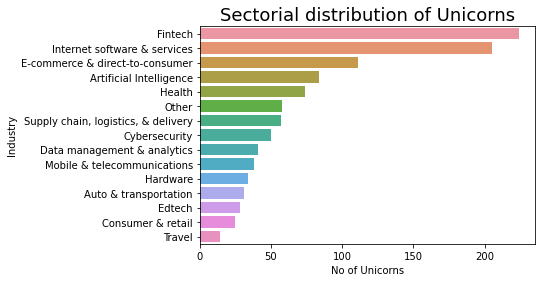

In [119]:
# Graphical illustration

ax = sns.barplot(data = Industy_unicorn, x=Industy_unicorn.Company, y= Industy_unicorn.index, orient='horizontal')
ax.set_title('Sectorial distribution of Unicorns', size=18)
ax.set_xlabel('No of Unicorns')


##### Analyse the industry with the fastest chance to become a Unicorn as well as the associated returns on investment

In [182]:
# calculating the years it takes to becoming a unicorn

Years_unicorn = df.groupby('Industry').mean()
Years_unicorn = Years_unicorn.loc[:]
Years_unicorn= Years_unicorn.sort_values(by='Year_to_be_a_unicorn', ascending=False)
Years_unicorn

,Valuation,Year_Founded,Funding,Year_to_be_a_unicorn,Return_on_investment
Industry,,,,,
Health,2.675676,2011.878378,0.418919,8.189189,1.716216
Consumer & retail,4.240000,2010.320000,1.040000,8.080000,1.840000
Data management & analytics,3.317073,2012.073171,0.317073,8.073171,1.414634
Internet software & services,2.902439,2012.531707,0.287805,7.868293,1.351220
Other,4.344828,2011.844828,0.672414,7.775862,1.189655
Edtech,3.571429,2011.535714,0.750000,7.714286,1.500000
"Supply chain, logistics, & delivery",3.105263,2013.035088,0.754386,6.929825,1.421053
Cybersecurity,2.580000,2013.600000,0.440000,6.800000,1.700000
Travel,3.285714,2012.214286,1.071429,6.571429,2.357143


(array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

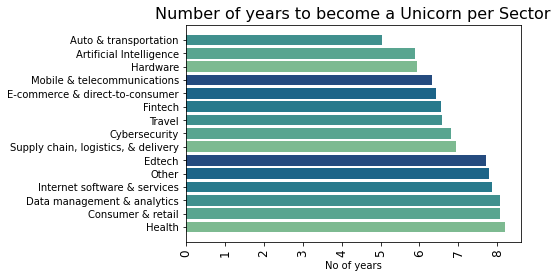

In [157]:
# Graphical illustration
colors = sns.color_palette("crest")

plt.barh(Years_unicorn.index, Years_unicorn.Year_to_be_a_unicorn, color=colors)
plt.title('Number of years to become a Unicorn per Sector', size=16)
plt.xlabel('No of years')
plt.xticks(rotation='vertical', size=12)


##### Investment and returns by sectors

C:\Users\sadeo\AppData\Local\Temp/ipykernel_11176/389311853.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(keys, rotation='vertical', size=10)
C:\Users\sadeo\AppData\Local\Temp/ipykernel_11176/389311853.py:20: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


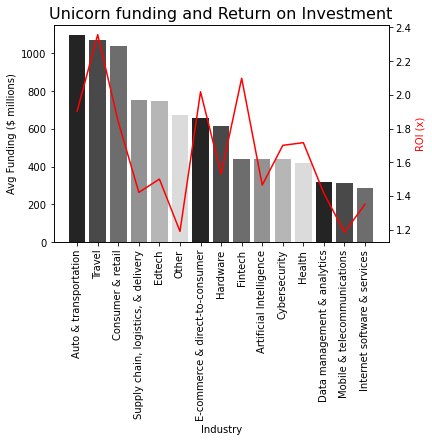

In [196]:
%matplotlib inline 

Years_unicorn1 = Years_unicorn.sort_values(by='Funding', ascending=False)

keys = Years_unicorn1.index
colors = sns.color_palette('gist_gray')

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(keys, Years_unicorn1.Funding*1000, color=colors)
ax2.plot(keys, Years_unicorn1.Return_on_investment, color='red')

ax1.set_xlabel('Industry')
ax1.set_ylabel('Avg Funding ($ millions)', color='black')
ax2.set_ylabel('ROI (x)', color='red')
ax1.set_xticklabels(keys, rotation='vertical', size=10)
ax1.set_title('Unicorn funding and Return on Investment', size=16)

fig.show()


C:\Users\sadeo\AppData\Local\Temp/ipykernel_11176/151401072.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(keys, rotation='vertical', size=10)
C:\Users\sadeo\AppData\Local\Temp/ipykernel_11176/151401072.py:19: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


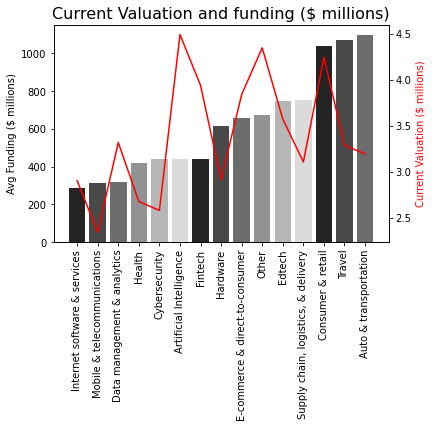

In [202]:
%matplotlib inline 

Years_unicorn1 = Years_unicorn.sort_values(by='Funding', ascending=True)

keys = Years_unicorn1.index
colors = sns.color_palette('gist_gray')

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(keys, Years_unicorn1.Funding*1000, color=colors)
ax2.plot(keys, Years_unicorn1.Valuation, color='red')

ax1.set_ylabel('Avg Funding ($ millions)', color='black')
ax2.set_ylabel('Current Valuation ($ millions)', color='red')
ax1.set_xticklabels(keys, rotation='vertical', size=10)
ax1.set_title('Current Valuation and funding ($ millions)', size=16)

fig.show()

#### Country Unicorn Analysis

Country analysis will be executed here while visualisations will be explored in Tableau

In [211]:
country_unicorn = df.groupby('Country').count()
country_unicorn = country_unicorn.Company
country_unicorn.to_excel('country.xlsx')

PermissionError: [Errno 13] Permission denied: 'country.xlsx'

In [ ]:
country_unicorn = df.groupby('Country').mean()
country_unicorn = country_unicorn.Company
country_unicorn.to_excel('country.xlsx')

In [ ]:
country_unicorn = df.groupby('Country').mean()
country_unicorn = country_unicorn.Company
country_unicorn.to_excel('country.xlsx')